In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


**1. The time in days to development of a tumor for rats exposed to a carcinogen follows a Weibull distribution with λ = 0.002 (scale parameter) and γ = 2 (shape parameter).**

**(a) Find the median and mean time to tumor development.**

In last week's homework, we found that the pdf of the Weibull is given by,

$$
f(t) = \lambda\gamma t^{\gamma-1} e^{-\lambda t ^{\gamma}}  I(t \ge 0)
$$

So, the mean is given by,

$$
E[T] = \int_0^\infty t\lambda\gamma t^{\gamma-1} e^{-\lambda t ^{\gamma}} dt
$$

$$
E[T] = \int_0^\infty \lambda\gamma t^\gamma e^{-\lambda t ^{\gamma}} dt
$$

Substitute for $\gamma$.

$$
E[T] = \int_0^\infty 2\lambda t^2 e^{-\lambda t ^{2}} dt
$$

$$
E[T] = \left[ \int 2\lambda t^2 e^{-\lambda t ^{2}} dt \right]_0^\infty
$$

Let,

$$
u = -t
$$

$$
dv = -2\lambda te^{-\lambda t^2}dt
$$

Then,

$$
du = -dt
$$

$$
v = e^{-\lambda t^2}
$$

Substitute for integration by parts.

$$
\int 2\lambda t^2 e^{-\lambda t ^{2}} dt =
\int udv
$$

$$
\int 2\lambda t^2 e^{-\lambda t ^{2}} dt =
uv - \int vdu
$$

$$
\int 2\lambda t^2 e^{-\lambda t ^{2}} dt =
-te^{-\lambda t^2}
- \int -e^{-\lambda t^2} dt
$$

$$
\int 2\lambda t^2 e^{-\lambda t ^{2}} dt =
\int e^{-{1 \over 2}{t^2 \over (2\lambda)^{-1}}} dt
-te^{-\lambda t^2}
$$

So,

$$
E[T] = \left[
    \int e^{-{1 \over 2}{t^2 \over (2\lambda)^{-1}}} dt
    -te^{-\lambda t^2}
\right]_0^\infty
$$

$$
E[T] = 
\int_0^\infty e^{-{1 \over 2}{t^2 \over (2\lambda)^{-1}}} dt
-\left[
    te^{-\lambda t^2}
\right]_0^\infty
$$

$$
E[T] = 
\int_0^\infty e^{-{1 \over 2}{t^2 \over (2\lambda)^{-1}}} dt
- \lim_{t \to \infty} (
    te^{-\lambda t^2}
)
+ (0)e^{-\lambda (0)^2}
$$

$$
E[T] = 
\int_0^\infty e^{-{1 \over 2}{t^2 \over (2\lambda)^{-1}}} dt
$$

We recognize this as a gaussian function. Using the formula for the integral of the gaussian, we get,

$$
\int_{-\infty}^\infty e^{-{1 \over 2}{t^2 \over (2\lambda)^{-1}}} dt =
\sqrt{2\pi (2\lambda)^{-1}}
$$

The gaussian is positive and symmetric about zero, so,

$$
\int_{0}^\infty e^{-{1 \over 2}{t^2 \over (2\lambda)^{-1}}} dt =
{1 \over 2}\sqrt{2\pi (2\lambda)^{-1}}
$$

Simplifying, we get,

$$
\int_{0}^\infty e^{-{1 \over 2}{t^2 \over (2\lambda)^{-1}}} dt =
{1 \over 2}\sqrt{\pi \over \lambda}
$$

$$
\int_{0}^\infty e^{-{1 \over 2}{t^2 \over (2\lambda)^{-1}}} dt \approx
19.82
$$

So,

$$
E[T] = {1 \over 2}\sqrt{500\pi} \approx 19.82
$$

The survival function of $T$ is given by,

$$
S(t) = e^{-\lambda t ^{\gamma}}
$$

The median is the $t$ such that,

$$
S(m) = {1 \over 2}
$$

So,

$$
{1 \over 2} = e^{-\lambda m ^{\gamma}}
$$

$$
\ln \left({1 \over 2}\right) = -\lambda m^{\gamma}
$$

$$
\ln \left(2\right) = \lambda m^{\gamma}
$$

$$
m = \left({\ln(2) \over \lambda}\right)^{1/\gamma}
$$

Substitute known values,

$$
m = \left({\ln(2) 500}\right)^{1/2}
$$

$$
m \approx 18.62
$$

**(b) Find the probabilities that a (random) rat will be tumor free at 10 days, 20 days and 30 days.**

The probability that a random rat will be tumour free is given by the survival function.

$$
S(10) = e^{-(0.002) 10 ^{2}} = e^{-0.2} \approx 81.87 \%
$$

$$
S(20) = e^{-(0.002) 20 ^{2}} = e^{-0.8} \approx 44.93 \%
$$

$$
S(20) = e^{-(0.002) 30 ^{2}} = e^{-1.8} \approx 16.53 \%
$$

**(c) Find the hazard rate of time to tumor development at 10 days, 20 days and 30 days.**

We found previously that the hazard rate is given by,

$$
h(t) = \lambda\gamma t^{\gamma-1}
$$

Substitute our parameters,

$$
h(t) = (0.002)2 t^{2-1} = 0.004t
$$

So,

$$
h(10) = 0.04
$$

$$
h(20) = 0.08
$$

$$
h(30) = 0.12
$$

**2. A modification of example from the course notes (Page 60). T1,...,Tn iid exponential(λ). The outcome is time to death from severe viral disease. The modified data are as follows:**

- Steroid: 1(2), 1+(2), 4+, 5, 7, 8, 10, 10+, 12+, 16+(3)
- Control: 1, 2, 3(2), 3+, 5+(2), 16+(8)

In [2]:
# put the above data into a dataframe

df <- data.frame(
    treatment =    c(rep(1, 14), rep(0, 15)),
    censored =     c(0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, rep(1, 11)),
    time_at_risk = c(1, 1, 1, 1, 4, 5, 7, 8, 10, 10, 12, 16, 16, 16, 1, 2, 3, 3, 3, 5, 5, rep(16, 8))
)

**(a) Find the MLE of hazard h(t) = λ for each of two treatment groups**

The MLE of hazard is given by number of events over time at risk.

In [3]:
stats = df %>%
    group_by(treatment) %>%
    summarize(
        n_events = sum(censored == 0), # if the unit isn't censored, an event occured
        total_time_at_risk = sum(time_at_risk)
    ) %>%
    mutate(
        hazard_rate_mle = n_events / total_time_at_risk
    )

stats

treatment,n_events,total_time_at_risk,hazard_rate_mle
<dbl>,<int>,<dbl>,<dbl>
0,4,150,0.02666667
1,6,108,0.05555556


So, MLE hazard rate is about 5.56% for treatment and 2.67% for control.

**(b) Find median and mean survival time for each treatment group**

We can create MLE estimators for the mean and median by using the properties of the exponential distribution. If the parameter is $\lambda$, then the mean is $\lambda^{-1}$ and the median is $\ln(2) \lambda^{-1}$.

In [4]:
stats = stats %>%
    mutate(
        mean_survival_mle = 1/hazard_rate_mle,
        median_survival_mle = log(2)/hazard_rate_mle
    )
    
stats %>% select(treatment, mean_survival_mle, median_survival_mle)

treatment,mean_survival_mle,median_survival_mle
<dbl>,<dbl>,<dbl>
0,37.5,25.99302
1,18.0,12.47665


**(c) For each treatment group, what is the p-value for $H0 : λ = 1$ versus $H1 : λ \ne 1$, using likelihood ratio test and Wald test?**

First, we'll calculate the likelihood ratio test statistic and p-value for treatment and control.

In [5]:
likelihood_ratio_test = function (null_rate) {
    df %>%
        # Add a column for the hazard rate (computed above)
        left_join(
            (stats %>%
                select(treatment, hazard_rate_mle)
            ),
            by='treatment'
        ) %>%

        # compute the log likelihood of each data point for the null and alternative hypotheses
        mutate(
            log_p_null = ifelse(censored == 1,
                # for censored data, use the log survival function
                log(1 - pexp(time_at_risk, rate = null_rate)),
                # for uncensored data, use the log density function
                dexp(time_at_risk, rate = null_rate, log=TRUE)
            ),
            log_p_alt = ifelse(censored == 1,
                log(1 - pexp(time_at_risk, rate = hazard_rate_mle)),
                dexp(time_at_risk, rate = hazard_rate_mle, log=TRUE)
            )
        ) %>%

        # group by treatment and compute the log likelihood for the null and alternative hypotheses
        group_by(treatment) %>%
        summarize(
            # sum the log likelihoods across treatment and control respectively
            log_p_null = sum(log_p_null),
            log_p_alt = sum(log_p_alt)
        ) %>%

        # compute the likelihood ratio test statistic and p-value
        mutate(
            likelihood_ratio_test_statistic = 2*(log_p_alt - log_p_null),
            # the test statistic is chi-squared distributed with 1 degree of freedom
            lr_p_value = 1 - pchisq(likelihood_ratio_test_statistic, df=1)
        )
}

likelihood_ratio_test(null_rate=1)

treatment,log_p_null,log_p_alt,likelihood_ratio_test_statistic,lr_p_value
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,-150,-18.49736,263.0053,0
1,-108,-23.34223,169.3155,0


The test statistics here are huge, so it makes sense the the p-value is essentially zero.

To calculate the Wald confidence interval, we need the standard error of $\hat{\lambda}$. Collet gives,

$$
\operatorname{se}(\hat{\lambda}) = {\hat{\lambda} \over \sqrt{r}}
$$

Here $r$ is the number of uncensored data points.

We calculate the number of uncensored data points in treatment and control.

In [6]:
r_counts = df %>%
    mutate(uncensored = 1 - censored) %>%
    group_by(treatment) %>%
    summarize(r = sum(uncensored))

r_counts

treatment,r
<dbl>,<dbl>
0,4
1,6


Calculate the standard error of the hazard rate for treatment and control using the hazard rate the the number of uncensored points.

In [7]:
hazard_rate_with_se = stats %>%
    left_join(r_counts, by="treatment") %>%
    mutate(
        se_hazard_rate = hazard_rate_mle / r^0.5
    ) %>%
    select(treatment, hazard_rate_mle, se_hazard_rate)

hazard_rate_with_se

treatment,hazard_rate_mle,se_hazard_rate
<dbl>,<dbl>,<dbl>
0,0.02666667,0.01333333
1,0.05555556,0.02268046


Then, we can calculate the Wald test statistic.

In [8]:
wald_test = function(null_hazard_rate) {
    hazard_rate_with_se %>%
        mutate(wald_statistic = (hazard_rate_mle - null_hazard_rate) / se_hazard_rate) %>%
        # two-sided test
        mutate(wald_p = 2*(1 - pnorm(abs(wald_statistic)))) %>%
        select(treatment, hazard_rate_mle, wald_statistic, wald_p)
}

wald_test(null_hazard_rate = 1)

treatment,hazard_rate_mle,wald_statistic,wald_p
<dbl>,<dbl>,<dbl>,<dbl>
0,0.02666667,-73.00000,0
1,0.05555556,-41.64133,0


The p-value is a numerical zero for both treatment and control.

I'm also gonna throw in a bootstrap test. This is a nonparametric test, and it doesn't rely on asymptotic results. So, it will be a good sanity check to the Wald and likelihood ratio results.

In [9]:
n = 1000
treatment_hazard_boots = rep(0, n)
control_hazard_boots = rep(0, n)

for (i in 1:n) {
    res = df %>%
        # resample the data
        sample_n(size = nrow(df), replace=TRUE) %>%
        # group by treatment and compute the hazard rate mle
        group_by(treatment) %>%
        summarize(
            time_at_risk = sum(time_at_risk),
            n_events = sum(censored == 0)
        ) %>%
        mutate(hazard_rate_mle = n_events / time_at_risk) %>%
        select(treatment, hazard_rate_mle)
    
    t_hazard = res %>% filter(treatment == 1) %>% pull(hazard_rate_mle)
    c_hazard = res %>% filter(treatment == 0) %>% pull(hazard_rate_mle)
    
    treatment_hazard_boots[i] = t_hazard
    control_hazard_boots[i] = c_hazard
}

boots = data.frame(
        treatment = treatment_hazard_boots,
        control = control_hazard_boots
    ) %>%
    pivot_longer(cols = everything(), names_to = "treatment", values_to = "hazard_rate") %>%
    mutate(treatment = as.numeric(treatment == "treatment"))

head(boots)

treatment,hazard_rate
<dbl>,<dbl>
1,0.041666667
0,0.018750000
1,0.020547945
0,0.079545455
1,0.160714286
0,0.005128205


The rows in this dataframe correspond to samples from the sampling distribution of $\lambda$ for treatment and control.

To do the bootstrap test, we compare the null to the distribution of the MLE hazard rate.

In [10]:
bootstrap_test = function(null_rate) {
    boots %>%
        mutate(smaller = hazard_rate < null_rate) %>%
        group_by(treatment) %>%

        # what proportion of the bootstrap samples are less than the null rate?
        summarize(quantile = mean(smaller)) %>%
        rowwise() %>%

        # two sided test
        mutate(bootstrap_p = min(quantile, 1 - quantile))
}

bootstrap_test(null_rate = 1)

treatment,quantile,bootstrap_p
<dbl>,<dbl>,<dbl>
0,1,0
1,1,0


The p-value is zero, meaning that every resampled value was less than $H_0: \lambda = 1$.

All three tests agree and reject the null with high confidence.

**(d) For each treatment group, what is the p-value for $H0 : λ = 0.05$ versus $H1 : λ \ne 0.05$ using likelihood ratio test and Wald test?**

In [11]:
likelihood_ratio_test(null_rate = 0.05)

treatment,log_p_null,log_p_alt,likelihood_ratio_test_statistic,lr_p_value
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,-19.48293,-18.49736,1.97113072,0.1603279
1,-23.37439,-23.34223,0.06432619,0.7997844


So, the p-values are 0.16 for the control and 0.80 for the treatment. We cannot reject the null $H_0: \lambda = 0.05$.

In [12]:
wald_test(null_hazard_rate = 0.05)

treatment,hazard_rate_mle,wald_statistic,wald_p
<dbl>,<dbl>,<dbl>,<dbl>
0,0.02666667,-1.750000,0.08011831
1,0.05555556,0.244949,0.80649594


The p-values here are similar, 0.08 for control and 0.81 for treatment. We cannot reject the null.

In [13]:
bootstrap_test(null_rate = 0.05)

treatment,quantile,bootstrap_p
<dbl>,<dbl>,<dbl>
0,0.906,0.094
1,0.413,0.413


The bootstrap test found a comparable p-value for control (p = 0.11), but the treatment p-value is quite different, at 0.39. This is much smaller than the 0.80 and 0.81 from the other tests. So, the bootstrap test is much more skeptical of the 0.05 value.

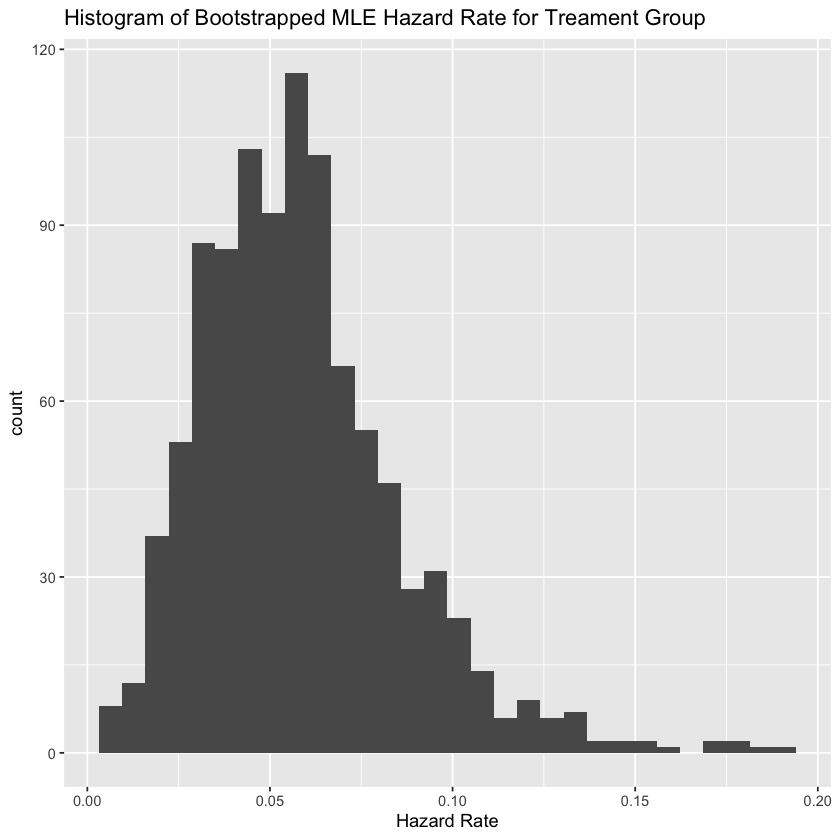

In [14]:
ggplot() +
    geom_histogram(
        aes(x = boots %>%
            filter(treatment == 1) %>%
            pull(hazard_rate)),
        bins=30
    ) +
    xlab("Hazard Rate") +
    labs(title="Histogram of Bootstrapped MLE Hazard Rate for Treament Group")

**(e) Construct 95% Wald confidence interval on λ for each group, is there overlap between these two 95% confidence intervals?**

In [15]:
hazard_rate_with_se %>%
    mutate(
        ci_95_lower = hazard_rate_mle - 1.96*se_hazard_rate,
        ci_95_upper = hazard_rate_mle + 1.96*se_hazard_rate
    )

treatment,hazard_rate_mle,se_hazard_rate,ci_95_lower,ci_95_upper
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0.02666667,0.01333333,0.0005333333,0.0528000
1,0.05555556,0.02268046,0.0111018528,0.1000093


So, the Wald 95% confidence interval for treatment hazard rate is $[0.0111018528,	0.1000093]$, and for the control hazard rate, it's $[0.0005333333,	0.0528000]$. These do overlap. So, we cannot reject the null that they are the same.

**(f) What is the hazard ratio (HR) and its 95%CI between two treatment groups? Hint: you may find 95%CI for log (HR) first (similar to page 66 in the course notes).**

Let $\rho$ represent the true hazard ratio. Let $\lambda_T$ and $\lambda_C$ be the true hazard rates for treatment and control. Then, $\rho$ is given by,

$$
\rho = {\lambda_T \over \lambda_C}
$$

We will use the estimator,

$$
\hat{\rho} = {\hat{\lambda}_T \over \hat{\lambda}_C}
$$

We defined $\hat{\lambda}_T$ and $\hat{\lambda}_C$ as MLE estimators, so by invariance, $\hat{\rho}$ is a maximum likelihood estimator.

Consider the 2-term truncated Taylor series of the natural log of this hazard rate estimator about $E[\hat{\lambda}]$.

$$
\ln(\hat{\lambda}) \approx \ln(E[\hat{\lambda}]) + \ln'(E[\hat{\lambda}])(\hat{\lambda} - E[\hat{\lambda}])
$$

$$
\ln(\hat{\lambda}) \approx \ln({1 \over \lambda}) + {1 \over \lambda}(\hat{\lambda} - \lambda)
$$

$$
\ln(\hat{\lambda}) \approx -\ln(\lambda) + {1 \over \lambda}\hat{\lambda} - 1
$$

Take the variance,

$$
var(\ln(\hat{\lambda})) \approx var({1 \over \lambda}\hat{\lambda})
$$

$$
var(\ln(\hat{\lambda})) \approx {1 \over \lambda^2}var(\hat{\lambda})
$$

We have that, $var(\hat{\lambda}) = {\lambda^2 \over r}$. So,

$$
var(\ln(\hat{\lambda})) \approx {1 \over \lambda^2}{\lambda^2 \over r}
$$

$$
var(\ln(\hat{\lambda})) \approx {1 \over r}
$$

Consider the natural log of the hazard ratio estimator, $\hat{\rho}$.

$$
\ln(\hat{\rho}) = \ln{\hat{\lambda}_T \over \hat{\lambda}_C}
$$

$$
\ln(\hat{\rho}) = \ln(\hat{\lambda}_T) - \ln(\hat{\lambda}_C)
$$

So,

$$
var(\ln(\hat{\rho})) = var(\ln(\hat{\lambda}_T) - \ln(\hat{\lambda}_C))
$$

The parameters $\hat{\lambda}_T$ and $\hat{\lambda}_C$ are functions of independent samples, so they are independent.

$$
var(\ln(\hat{\rho})) = var(\ln(\hat{\lambda}_T)) + var(\ln(\hat{\lambda}_C))
$$

Using the approximation derived above, we get,

$$
var(\ln(\hat{\rho})) \approx {1 \over r_T} + {1 \over r_C}
$$

We can use this to construct a 95% Wald confidence interval for $\ln(\rho)$.

$$
\ln(\hat{\rho}) \pm 1.96\sqrt{{1 \over r_T} + {1 \over r_C}}
$$

So, our confidence interval for $\rho$ is given by,

$$
\hat{\rho}\exp \left(\pm 1.96\sqrt{{1 \over r_T} + {1 \over r_C}} \right)
$$

Calculate $\hat{\rho}$

In [16]:
lambda_hats = stats %>%
    select(hazard_rate_mle) %>%
    pull()

rho_hat = lambda_hats[2] / lambda_hats[1]

rho_hat

[1] 2.083333

Calculate the 95% Wald confidence interval.

In [17]:
sum_recip = r_counts %>%
    mutate(r_recip = 1/r) %>%
    summarize(sum(r_recip)) %>%
    pull()

error_band = exp(1.96*sqrt(sum_recip))

c(rho_hat/error_band, rho_hat*error_band)

[1] 0.5878959 7.3827318

Let's do the 95% confidence interval on the hazard rattio using the bootstrap. We can compare this to the Wald confidence interval to confirm that they corroborate each other.

[1] 2.900822

[1] 2.118146

2.5%      97.5% 
 0.4097746 10.0552250

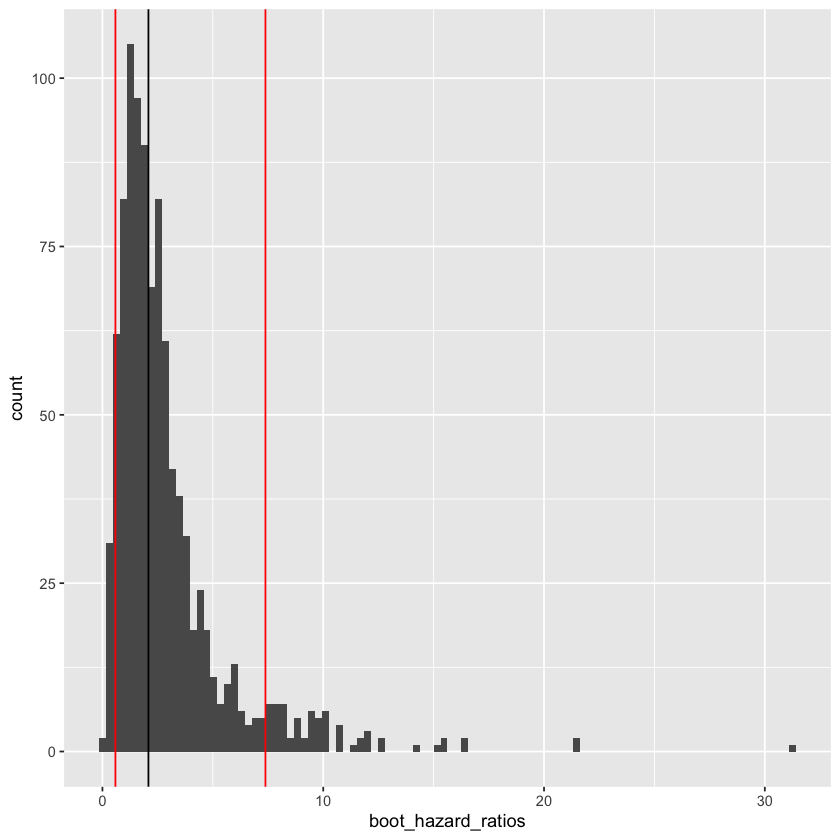

In [18]:
boot_hazard_ratios = data.frame(
    treat_boot = boots %>% filter(treatment == 1) %>% pull(hazard_rate),
    control_boot = boots %>% filter(treatment == 0) %>% pull(hazard_rate)
) %>%
    mutate(hazard_ratio = treat_boot / control_boot) %>%
    pull(hazard_ratio)

boot_hazard_ratios = boot_hazard_ratios[!is.nan(boot_hazard_ratios) & !is.infinite(boot_hazard_ratios)]

mean(boot_hazard_ratios)
median(boot_hazard_ratios)
quantile(boot_hazard_ratios, c(0.025, 0.975))

ggplot() +
    geom_histogram(aes(x=boot_hazard_ratios), bins=100) +
    geom_vline(xintercept=rho_hat) +
    geom_vline(xintercept=c(rho_hat/error_band, rho_hat*error_band), color="red")


The red lines are the 95% Wald confidence interval, and the black line is the MLE hazard ratio. They seem like a sane summary of the bootstrap distribution.

The bootstap confidence interval of $[0.535744322960471, 11.1300479808077]$, which is pretty similar to the Wald confidence interval of $[0.587895901700502, 7.3827318156555]$.

This suggests that we didn't make a terrible mistake anywhere.